## This is a mini project to show how to detect multicollinearity

In [43]:
#importing all libraries
import pandas as pd
import numpy as np
import scipy 
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline 
from statsmodels.stats.anova import anova_lm

In [2]:
#loading data
data= pd.read_csv('MulticollinearityExample.csv')
data

,Femoral Neck,%Fat,Weight kg,Activity,%Fat S,Weight S,Activity S
0,0.934,25.3,52.163126,3508.44,-3.265217,-1.765066,946.450435
1,0.888,29.3,61.801965,2773.54,0.734783,7.873772,211.550435
2,0.933,37.7,93.440034,1738.97,9.134783,39.511842,-823.019565
3,0.757,32.8,59.874197,1665.29,4.234783,5.946005,-896.699565
4,1.031,24.6,50.348756,3982.95,-3.965217,-3.579436,1420.960435
5,0.883,26.5,57.606235,2985.74,-2.065217,3.678043,423.750435
6,0.837,21.2,51.709534,3002.38,-7.365217,-2.218658,440.390435
7,0.912,28.4,54.884680,3232.98,-0.165217,0.956488,670.990435
8,0.853,24.0,53.977496,2823.68,-4.565217,0.049304,261.690435
9,0.825,28.7,53.523903,2414.12,0.134783,-0.404289,-147.869565


Data Description and basic EDA

In [3]:
data.describe()

,Femoral Neck,%Fat,Weight kg,Activity,%Fat S,Weight S,Activity S
count,92.000000,92.000000,92.000000,92.000000,9.200000e+01,9.200000e+01,9.200000e+01
mean,0.803120,28.565217,53.928192,2561.989565,-5.792468e-17,-1.459702e-14,-4.995424e-13
std,0.104216,6.989229,15.100364,1042.466601,6.989229e+00,1.510036e+01,1.042467e+03
min,0.558000,16.800000,33.565838,824.250000,-1.176522e+01,-2.036235e+01,-1.737740e+03
25%,0.736500,23.150000,43.885065,1816.932500,-5.415217e+00,-1.004313e+01,-7.450571e+02
50%,0.791000,27.350000,49.498271,2430.260000,-1.215217e+00,-4.429921e+00,-1.317296e+02
75%,0.853750,33.075000,58.910313,3003.507500,4.509783e+00,4.982121e+00,4.415179e+02
max,1.081000,46.800000,98.429551,7191.080000,1.823478e+01,4.450136e+01,4.629090e+03


In [4]:
data.isnull().count()

Femoral Neck    92
%Fat            92
Weight kg       92
Activity        92
%Fat S          92
Weight S        92
Activity S      92
dtype: int64

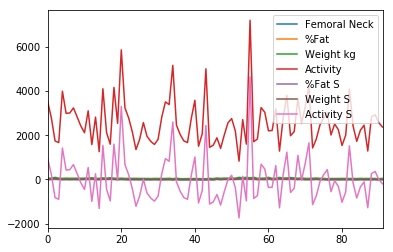

In [5]:
data.plot()

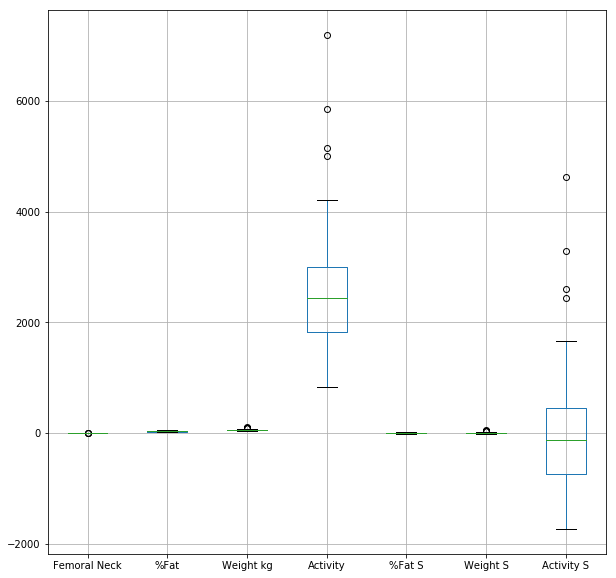

In [6]:
data.boxplot(figsize=(10,10))

In [7]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

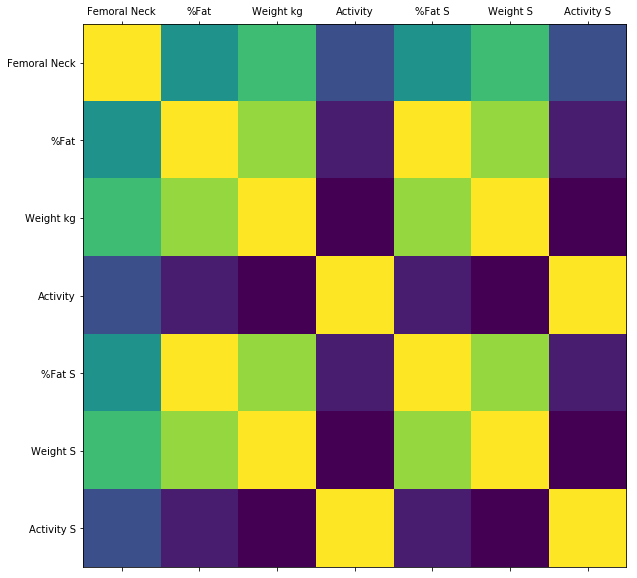

In [8]:
plot_corr(data)

In [9]:
abs(data.corr())

,Femoral Neck,%Fat,Weight kg,Activity,%Fat S,Weight S,Activity S
Femoral Neck,1.000000,0.455584,0.656793,0.161818,0.455584,0.656793,0.161818
%Fat,0.455584,1.000000,0.826715,0.022527,1.000000,0.826715,0.022527
Weight kg,0.656793,0.826715,1.000000,0.107668,0.826715,1.000000,0.107668
Activity,0.161818,0.022527,0.107668,1.000000,0.022527,0.107668,1.000000
%Fat S,0.455584,1.000000,0.826715,0.022527,1.000000,0.826715,0.022527
Weight S,0.656793,0.826715,1.000000,0.107668,0.826715,1.000000,0.107668
Activity S,0.161818,0.022527,0.107668,1.000000,0.022527,0.107668,1.000000


Prepare for model

In [10]:
model= LinearRegression()

In [11]:
x= data.drop(['Femoral Neck'], axis=1)
y= data[['Femoral Neck']]

In [12]:
x.head()

,%Fat,Weight kg,Activity,%Fat S,Weight S,Activity S
0,25.3,52.163126,3508.44,-3.265217,-1.765066,946.450435
1,29.3,61.801965,2773.54,0.734783,7.873772,211.550435
2,37.7,93.440034,1738.97,9.134783,39.511842,-823.019565
3,32.8,59.874197,1665.29,4.234783,5.946005,-896.699565
4,24.6,50.348756,3982.95,-3.965217,-3.579436,1420.960435


In [13]:
y.head()

,Femoral Neck
0,0.934
1,0.888
2,0.933
3,0.757
4,1.031


In [14]:
X_train, X_test, y_train, y_test= train_test_split(data, y, test_size= 0.2, random_state= 14)

In [15]:
print('X_train: ',X_train)
print('X_test: ',X_test)
print('y_train: ',y_train)
print('y_test: ',y_test)

X_train:      Femoral Neck  %Fat  Weight kg  Activity     %Fat S   Weight S   Activity S
91         0.735  25.6  47.627202   2366.34  -2.965217  -6.300990  -195.649565
46         0.815  41.0  63.049344   1880.67  12.434783   9.121152  -681.319565
33         0.782  26.8  52.163126   3381.07  -1.765217  -1.765066   819.080435
51         0.762  36.4  54.431088   2187.21   7.834783   0.502896  -374.779565
29         0.800  28.3  46.720017   1580.64  -0.265217  -7.208175  -981.349565
8          0.853  24.0  53.977496   2823.68  -4.565217   0.049304   261.690435
42         0.558  31.9  33.565838   2060.48   3.334783 -20.362354  -501.509565
90         0.622  22.9  34.019430   2560.61  -5.665217 -19.908762    -1.379565
81         0.856  23.4  44.452055   2002.41  -5.165217  -9.476137  -559.579565
56         1.010  39.4  98.429551   1704.27  10.834783  44.501359  -857.719565
63         0.980  39.2  91.625665   1280.89  10.634783  37.697473 -1281.099565
34         0.681  17.8  34.586421   5153.5

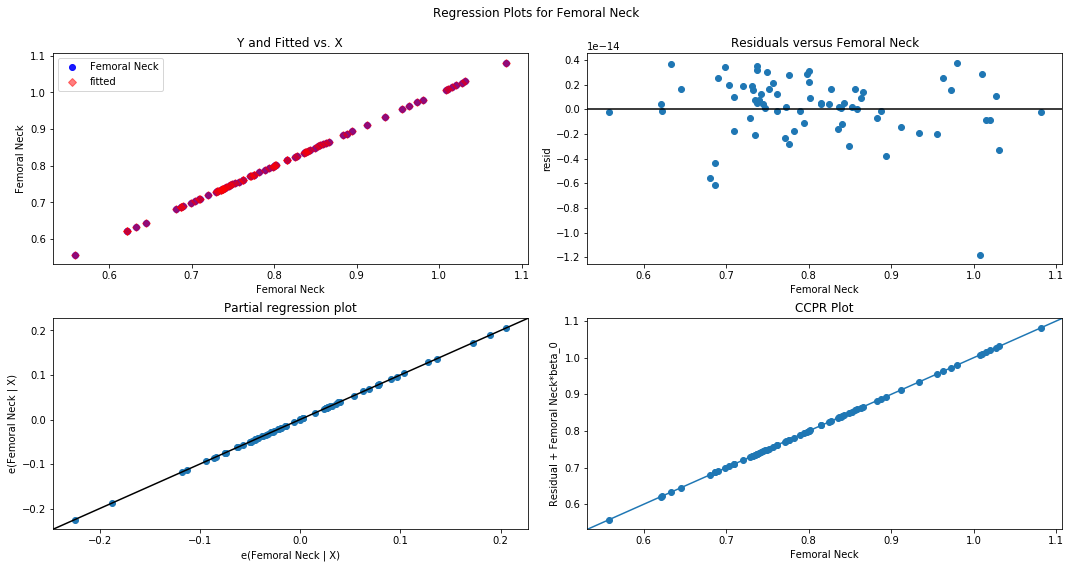

In [19]:
fig= plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model, 'Femoral Neck', fig=fig)
plt.show()

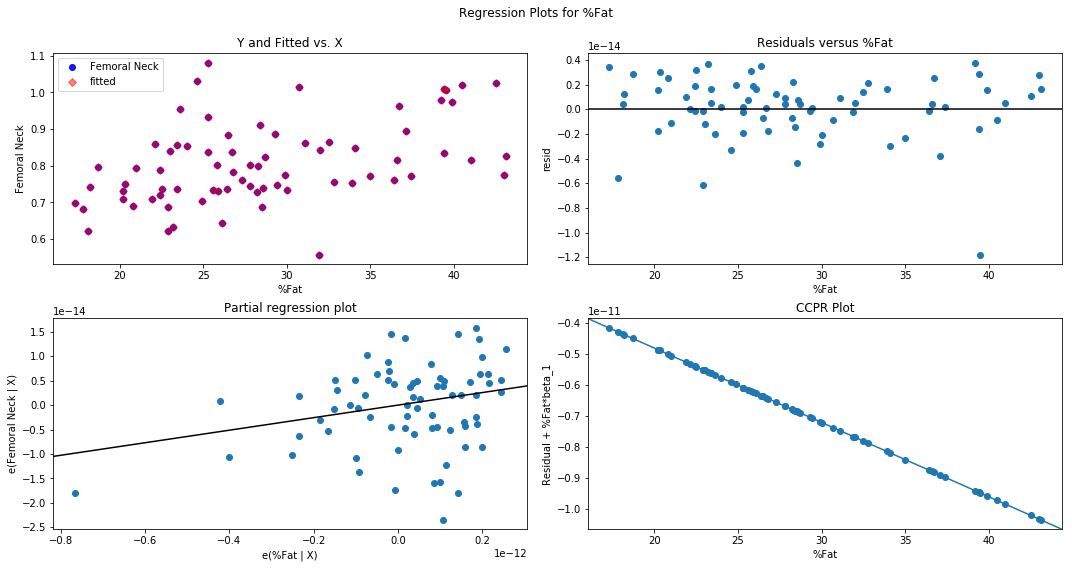

In [21]:
fig= plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model, '%Fat', fig=fig)
plt.show()

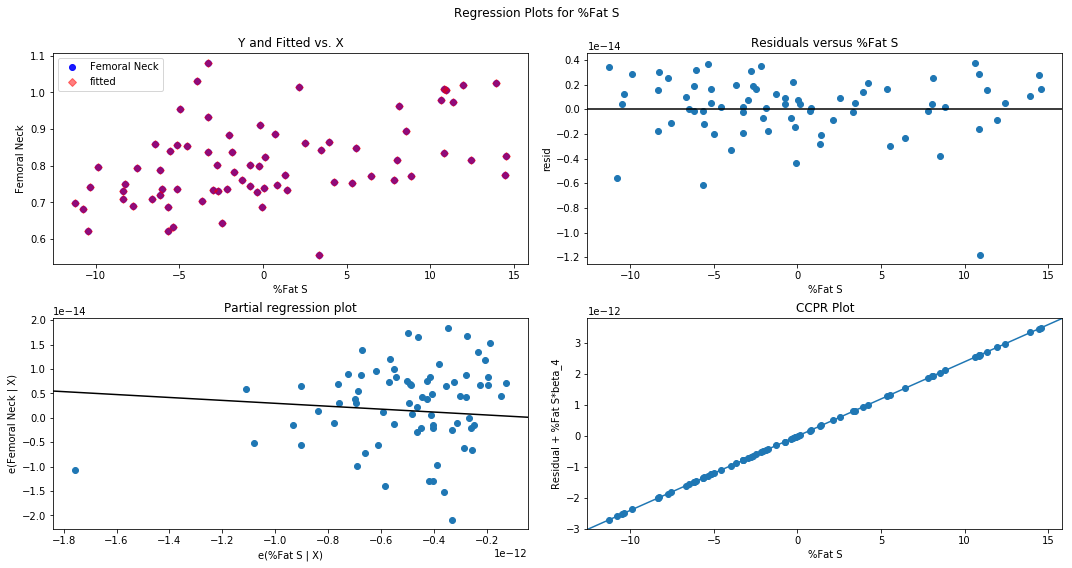

In [22]:
fig= plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model, '%Fat S', fig=fig)
plt.show()

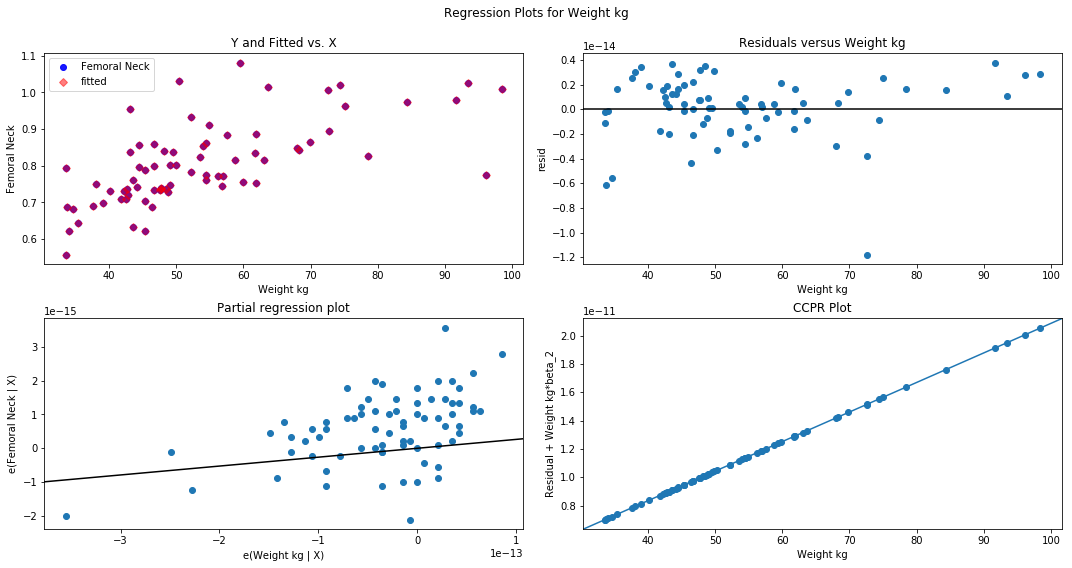

In [23]:
fig= plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model, 'Weight kg', fig=fig)
plt.show()

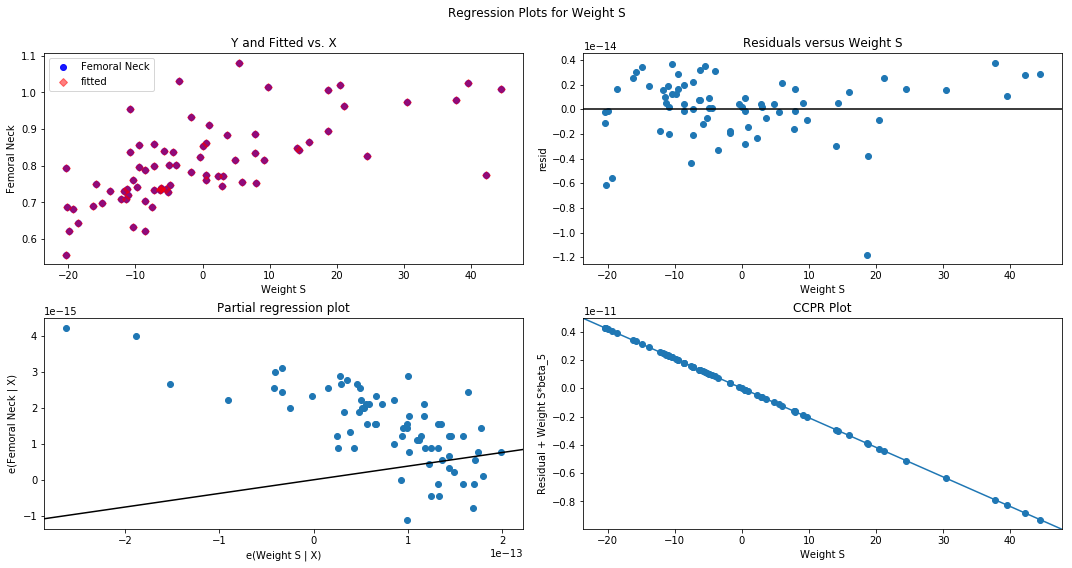

In [24]:
fig= plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model, 'Weight S', fig=fig)
plt.show()

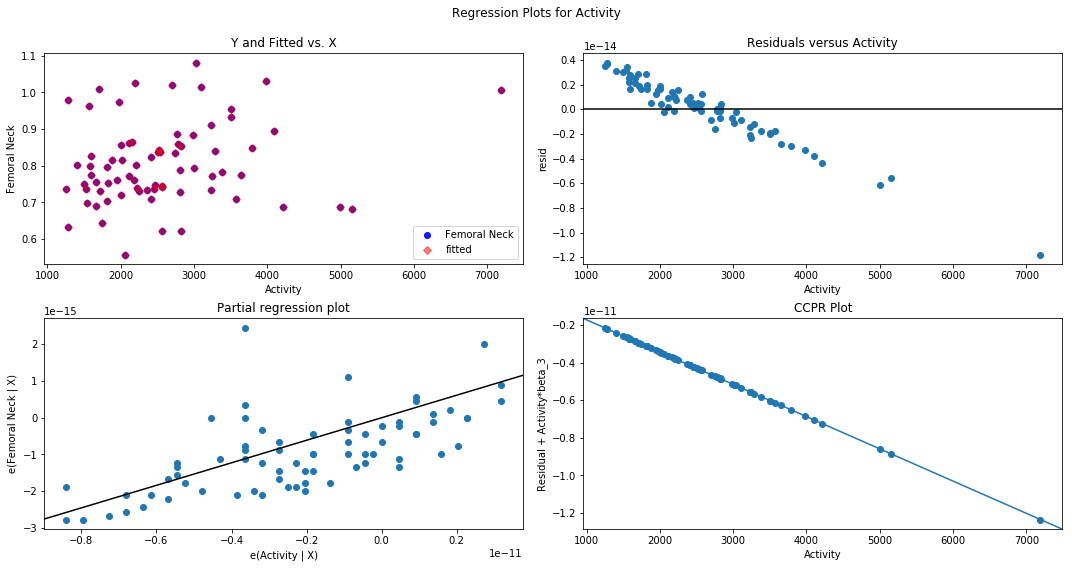

In [25]:
fig= plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model, 'Activity', fig=fig)
plt.show()

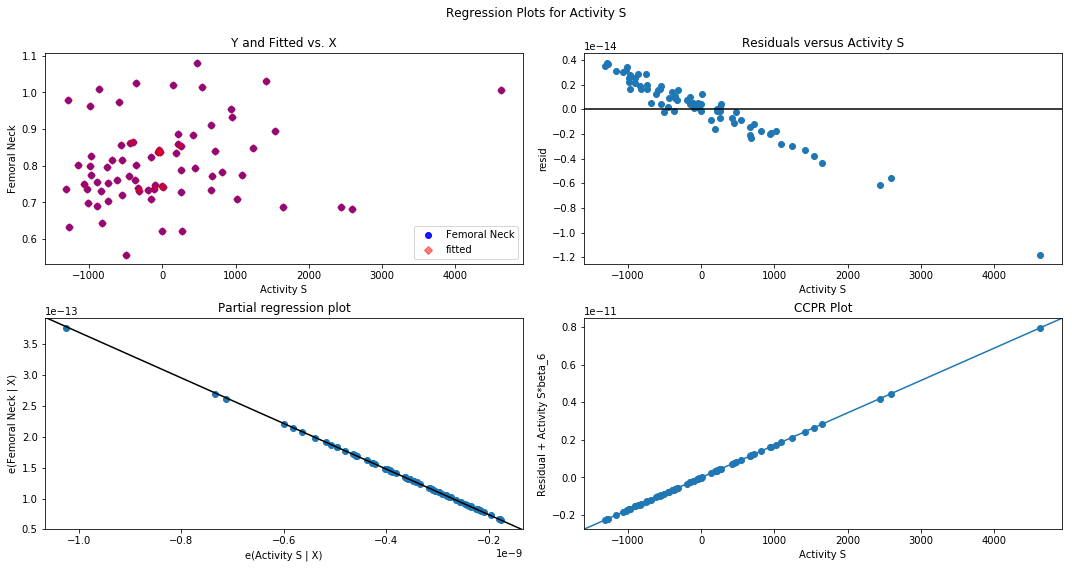

In [26]:
fig= plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model, 'Activity S', fig=fig)
plt.show()

In [34]:
X_train= X_train.drop(['Femoral Neck'], axis=1)

In [37]:
X= X_train
y= y_train
model= sm.OLS(y, X).fit()
predictions= model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Femoral Neck   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     26.25
Date:                Tue, 18 Jun 2019   Prob (F-statistic):           1.93e-11
Time:                        14:11:10   Log-Likelihood:                 85.150
No. Observations:                  73   AIC:                            -162.3
Df Residuals:                      69   BIC:                            -153.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
%Fat          -0.0026      0.001     -2.181      0.033      -0.005      -0.000
Weight kg      0.0035      0.001      6.409      0.000       0.002       0.005
Activity       0.0003   8.18e-06     33.003      0.000       0.000       0.000
%Fat S        -0.0026      0.001     -2.186      0.032      -0.005      -0.000
Weight S       0.0035      0.001      6.389      0.000       0.002       0.005
Activity S    -0.0002   1.26e-05    -19.288      0.000      -0.000      -0.000
==============================================================================
Omnibus:                        3.737   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.154   Jarque-Bera (JB):                3.784
Skew:                           0.156   Prob(JB):                        0.151
Kurtosis:                       4.071   Cond. No.                     4.88e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.37e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [42]:
model = ols("y ~ x", data).fit()

NameError: name 'ols' is not defined

In [41]:
anova_results = anova_lm(model)
print('\nANOVA results')
print(anova_results)

AttributeError: 'LinearRegression' object has no attribute 'model'